In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
!pip install hickle
import hickle as hkl
import os
import gc
import matplotlib.pyplot as plt
from keras import layers,Input,Sequential
from keras.layers import Dense,Flatten,Reshape,Conv2DTranspose,Conv2D,MaxPooling2D,Reshape,Resizing,Dropout,UpSampling2D
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
from google.colab  import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
with strategy.scope():
    load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
    reconstructed_front = tf.keras.models.load_model('/gdrive/My Drive/Yedek/Models_Static/Frontal', options=load_locally)
    reconstructed_left= tf.keras.models.load_model('/gdrive/My Drive/Yedek/Models_Static/Left', options=load_locally)
    reconstructed_right = tf.keras.models.load_model('/gdrive/My Drive/Yedek/Models_Static/Right', options=load_locally)

In [ ]:
load_hkl_frontal = hkl.load("/gdrive/My Drive/Yedek/Autoencoder_Datasets/Static/Frontal.hkl")
X_train_frontal=load_hkl_frontal['xtrain'] / 255.
X_test_frontal=load_hkl_frontal['xtest'] / 255.
y_train_frontal=load_hkl_frontal['ytrain']
y_test_frontal=load_hkl_frontal['ytest']
del load_hkl_frontal
gc.collect()

114086

In [ ]:
load_hkl_left = hkl.load("/gdrive/My Drive/Yedek/Autoencoder_Datasets/Static/Left.hkl")
X_train_left=load_hkl_left['xtrain'] / 255.
X_test_left=load_hkl_left['xtest'] / 255.
del load_hkl_left
gc.collect()

0

In [ ]:
load_hkl_right = hkl.load("/gdrive/My Drive/Yedek/Autoencoder_Datasets/Static/Right.hkl")
X_train_right=load_hkl_right['xtrain'] / 255.
X_test_right=load_hkl_right['xtest'] / 255.
del load_hkl_right
gc.collect()

0

In [ ]:
xm_train_frontal=reconstructed_front.encoder(X_train_frontal)
xm_test_frontal=reconstructed_front.encoder(X_test_frontal)
del X_train_frontal
del X_test_frontal
gc.collect()

0

In [ ]:
xm_train_left=reconstructed_left.encoder(X_train_left)
xm_test_left=reconstructed_left.encoder(X_test_left)
del X_train_left
del X_test_left
gc.collect()

0

In [ ]:
xm_train_left45=reconstructed_left45.encoder(X_train_left45)
xm_test_left45=reconstructed_left45.encoder(X_test_left45)
del X_train_left45
del X_test_left45
gc.collect()

0

In [ ]:
xm_train_right=reconstructed_right.encoder(X_train_right)
xm_test_right=reconstructed_right.encoder(X_test_right)
del X_train_right
del X_test_right
gc.collect()

0

In [ ]:
xm_train_right45=reconstructed_right45.encoder(X_train_right45)
xm_test_right45=reconstructed_right45.encoder(X_test_right45)
del X_train_right45
del X_test_right45
gc.collect()

0

In [ ]:
xm_train_frontal=tf.reshape(xm_train_frontal,[xm_train_frontal.shape[0],-1])
xm_test_frontal=tf.reshape(xm_test_frontal,[xm_test_frontal.shape[0],-1])

xm_train_left=tf.reshape(xm_train_left,[xm_train_left.shape[0],-1])
xm_test_left=tf.reshape(xm_test_left,[xm_test_left.shape[0],-1])

xm_train_left45=tf.reshape(xm_train_left45,[xm_train_left45.shape[0],-1])
xm_test_left45=tf.reshape(xm_test_left45,[xm_test_left45.shape[0],-1])

xm_train_right=tf.reshape(xm_train_right,[xm_train_right.shape[0],-1])
xm_test_right=tf.reshape(xm_test_right,[xm_test_right.shape[0],-1])

xm_train_right45=tf.reshape(xm_train_right45,[xm_train_right45.shape[0],-1])
xm_test_right45=tf.reshape(xm_test_right45,[xm_test_right45.shape[0],-1])


In [ ]:
xm_train_frontal.shape

TensorShape([194, 614400])

In [ ]:
xm_test_frontal.shape[0]

83

In [ ]:
  xm_train_vector=np.empty((xm_train_frontal.shape[0],0),dtype='float32')
  y_train_vector=y_train_frontal
  xm_test_vector=np.empty((xm_test_frontal.shape[0],0),dtype='float32')
  y_test_vector=y_test_frontal

  xm_train_vector=np.concatenate((xm_train_vector,xm_train_frontal),axis=1)
  xm_train_vector=np.concatenate((xm_train_vector,xm_train_left),axis=1)
  xm_train_vector=np.concatenate((xm_train_vector,xm_train_left45),axis=1)
  xm_train_vector=np.concatenate((xm_train_vector,xm_train_right),axis=1)
  xm_train_vector=np.concatenate((xm_train_vector,xm_train_right45),axis=1)

  xm_test_vector=np.concatenate((xm_test_vector,xm_test_frontal),axis=1)
  xm_test_vector=np.concatenate((xm_test_vector,xm_test_left),axis=1)
  xm_test_vector=np.concatenate((xm_test_vector,xm_test_left45),axis=1)
  xm_test_vector=np.concatenate((xm_test_vector,xm_test_right),axis=1)
  xm_test_vector=np.concatenate((xm_test_vector,xm_test_right45),axis=1)

  del xm_train_frontal
  del xm_train_left
  del xm_train_left45
  del xm_train_right
  del xm_train_right45

  print(xm_train_vector.shape)
  gc.collect()

(194, 1843200)


0

## **Machine Learning**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

xm_train_vector=scaler.fit_transform(xm_train_vector)
xm_test_vector=scaler.transform(xm_test_vector)
gc.collect()

0

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel="sigmoid")
gc.collect()

0

In [ ]:
svc.fit(xm_train_vector, y_train_vector)
#del xm_train_vector
#del y_train_vector
gc.collect()

0

In [ ]:
y_pred_vector=svc.predict(xm_test_vector)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test_vector, y_pred_vector)
print(cm)
print(classification_report(y_test_vector, y_pred_vector))

[[52  1]
 [ 7 23]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93        53
         1.0       0.96      0.77      0.85        30

    accuracy                           0.90        83
   macro avg       0.92      0.87      0.89        83
weighted avg       0.91      0.90      0.90        83



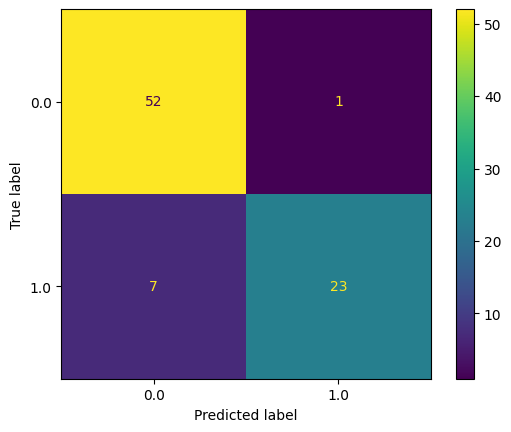

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()